In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [18]:
train_dir = '/content/intel image classification/seg_train'
test_dir = '/content/intel image classification/seg_test'

train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5167 - loss: 1.2474

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.5169 - loss: 1.2469 - val_accuracy: 0.7373 - val_loss: 0.7293
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 38s 40ms/step - accuracy: 0.7479 - loss: 0.6947 - val_accuracy: 0.8007 - val_loss: 0.5464
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.8033 - loss: 0.5510 - val_accuracy: 0.8000 - val_loss: 0.5445
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8389 - loss: 0.4416 - val_accuracy: 0.8070 - val_loss: 0.5560
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.8697 - loss: 0.3591 - val_accuracy: 0.8083 - val_loss: 0.5880
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9020 - loss: 0.2792 - val_accuracy: 0.8383 - val_loss: 0.5334
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9284 - loss: 0.2035 - val_accuracy: 0.8243 - val_loss: 0.5436
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.9466 - loss: 0.1584 - val_accurac

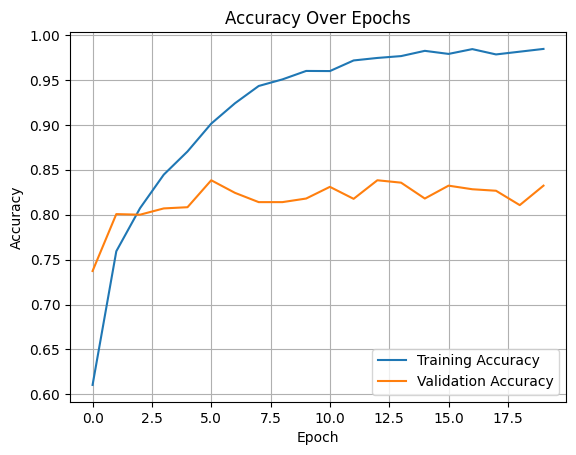

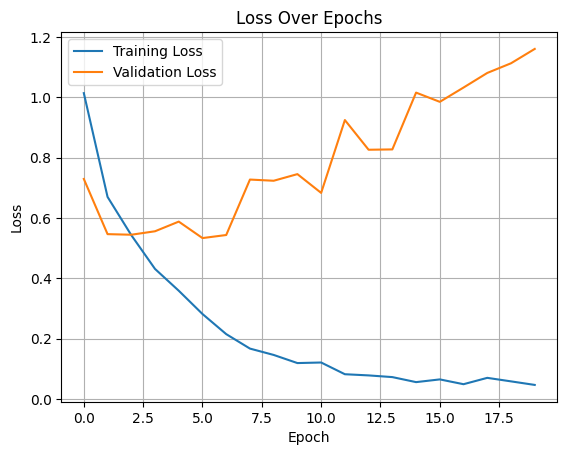

In [20]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [21]:
model.save('model.h5')

In [22]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
Predicted class: mountain


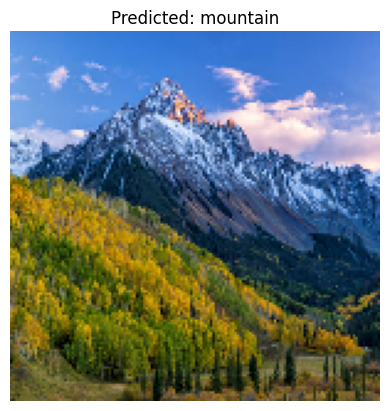

In [23]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/sample_image.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)]

# Output
print(f"Predicted class: {predicted_class}")

# Visualize
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()
